## Mini Project on Big Mart 2013 sales data 
In this Project we Study On BigMart 2013 sales data for 1559 products across 10 stores in different cities, Using the model, we  will try to understand the properties of products and stores which play a key role in increasing sales.

In this project we have studied some important module to check accuracy :
- Data Structure and Content
- Exploratory Data Analysis
- Univariate Analysis
- Bivariate Analysis
- Missing Value Treatment
- Linear Regression
- RandomForest
- RandomForest

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline     
# to visulise the graph instantly, inline used
warnings.filterwarnings('ignore')

# warnings  is used to avoid some unnecessary information, printed by the module.

## Import Data

In [2]:
df = pd.read_csv("Train.csv")
df.head()      #head is used for showing first 5 rows

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
#statistical information of dataset

df.describe()


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [4]:
##for datatype of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
# checking unique value in dataset
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

## Data Preprocessing:

In [6]:
#check for null values
df.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# check for categorical attributes

cat_col = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
cat_col


['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [8]:
# remove unnecessary column

cat_col.remove('Item_Identifier')
cat_col.remove('Outlet_Identifier')
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [9]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [10]:
## print the categorical columns

for col in cat_col:
    print(col)
    print(df[col].value_counts())
    print()


Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Size
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int6

### Missing Value Treatment

In [11]:
#fill the null value

df['Item_Weight'].isnull().sum()

1463

In [12]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace = True)

In [13]:
df['Item_Weight'].isnull().sum()

0

In [14]:
df['Outlet_Size'].isnull().sum()

2410

In [15]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace = True)

In [16]:
df['Outlet_Size'].isnull().sum()

0

### Creation of New Attributes

In [17]:

df["New_item_type"] = df['Item_Identifier'].apply(lambda x :x[: 2])
df["New_item_type"]


0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_item_type, Length: 8523, dtype: object

In [18]:
df["New_item_type"] = df["New_item_type"].map({'FD':'Food', 'NC':'Non-Consumable', 'DR':'Drinks'})
df["New_item_type"].value_counts()


Food              6125
Non-Consumable    1599
Drinks             799
Name: New_item_type, dtype: int64

In [19]:
df['Item_Fat_Content'].head(20)

0     Low Fat
1     Regular
2     Low Fat
3     Regular
4     Low Fat
5     Regular
6     Regular
7     Low Fat
8     Regular
9     Regular
10    Low Fat
11    Regular
12    Regular
13    Regular
14    Low Fat
15    Regular
16    Low Fat
17    Regular
18    Low Fat
19    Low Fat
Name: Item_Fat_Content, dtype: object

In [20]:
#  combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF' : 'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df["Item_Fat_Content"]

0       Low Fat
1       Regular
2       Low Fat
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Regular
8520    Low Fat
8521    Regular
8522    Low Fat
Name: Item_Fat_Content, Length: 8523, dtype: object

In [21]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [22]:
df.loc[df['New_item_type']=='Non-Consumable', 'Item_Fat_Content'] = 'Non-Edible'
df['Item_Fat_Content'].value_counts()

Low Fat       3918
Regular       3006
Non-Edible    1599
Name: Item_Fat_Content, dtype: int64

##  Exploratory data analysis

univariate analysis, which is the analysis of a each variable

In [23]:
# univariate analysis, which is the analysis of a each variable

In [24]:
num_col = []
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_col.append(i)
num_col

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

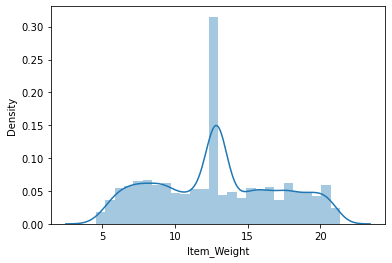

In [25]:
sns.distplot(df['Item_Weight'])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

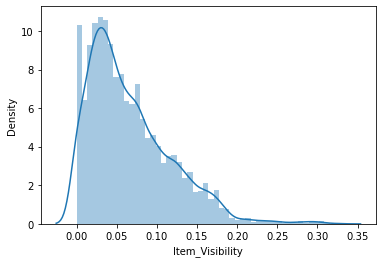

In [26]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

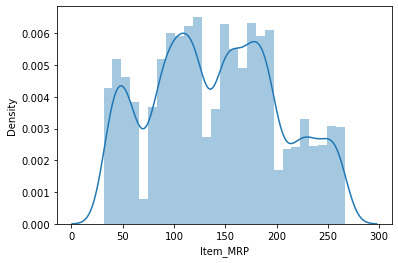

In [27]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

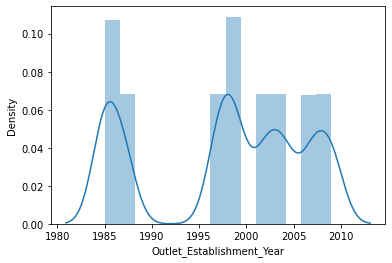

In [28]:
sns.distplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

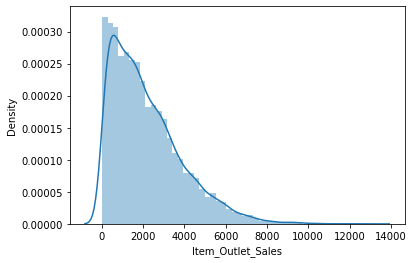

In [29]:
sns.distplot(df['Item_Outlet_Sales'])

In [30]:
cat_col

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

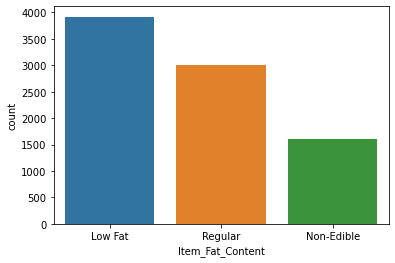

In [31]:
sns.countplot(df['Item_Fat_Content'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

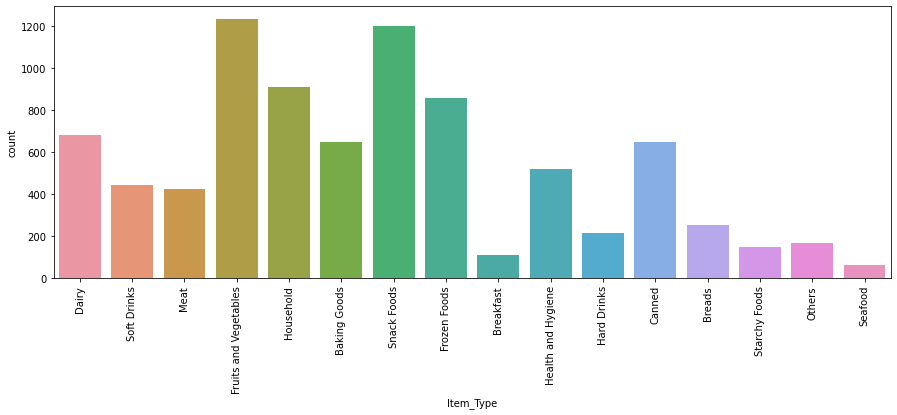

In [32]:
#analysis for categorical data
plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df["Item_Type"])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

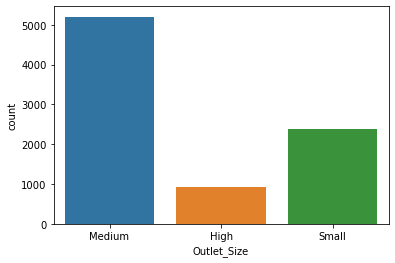

In [33]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

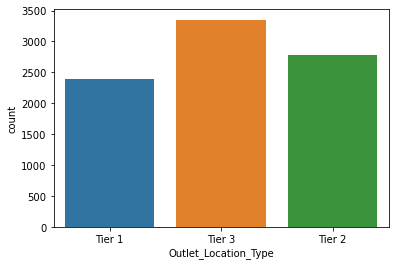

In [34]:
sns.countplot(df["Outlet_Location_Type"])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

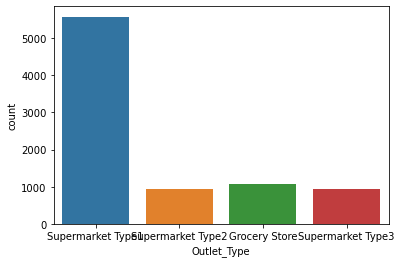

In [35]:
sns.countplot(df['Outlet_Type'])

<AxesSubplot:>

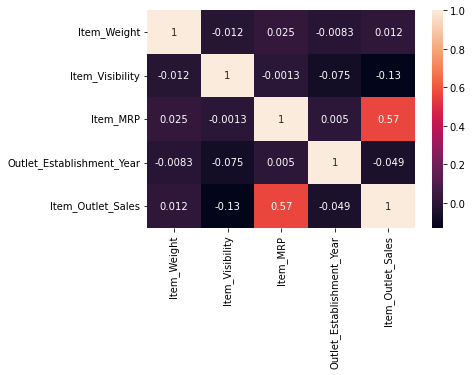

In [36]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='rocket')

# a positive correlation is between 'Item_MRP' and 'Item_Outlet_Sales'UT.
# A strong negative correlation is between 'Item_Outlet_sales' and 'Item_visibility'.

## Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Outlet'] = le.fit_transform(df['Outlet_Identifier'])
cat_col = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_item_type']
for col in cat_col:
    df[col] = le.fit_transform(df[col])
    
#label Incoding used for converting categorical data to provide intiger Value

### Onehot Encoding

In [38]:
df = pd.get_dummies(df, columns=['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'])
df.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,New_item_type,Outlet,...,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Type_0,Outlet_Type_1,Outlet_Type_2,Outlet_Type_3
0,FDA15,9.30,0.016047,4,249.8092,OUT049,1999,3735.1380,1,9,...,0,1,0,1,0,0,0,1,0,0
1,DRC01,5.92,0.019278,14,48.2692,OUT018,2009,443.4228,0,3,...,0,1,0,0,0,1,0,0,1,0
2,FDN15,17.50,0.016760,10,141.6180,OUT049,1999,2097.2700,1,9,...,0,1,0,1,0,0,0,1,0,0
3,FDX07,19.20,0.000000,6,182.0950,OUT010,1998,732.3800,1,0,...,0,1,0,0,0,1,1,0,0,0
4,NCD19,8.93,0.000000,9,53.8614,OUT013,1987,994.7052,2,1,...,1,0,0,0,0,1,0,1,0,0


### Input Split

In [39]:
X = df.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier', 'Item_Outlet_Sales'])
y = df['Item_Outlet_Sales']

### Model training ( Linear Regrassion)

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    model.fit(X, y)
    
    # predict the training set
    pred = model.predict(X)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("MSE:",mean_squared_error(y,pred))
    print("CV Score:", cv_score)

Model Report
MSE: 1273569.5959396425
CV Score: 1279418.048581853


<AxesSubplot:title={'center':'Model Coefficients'}>

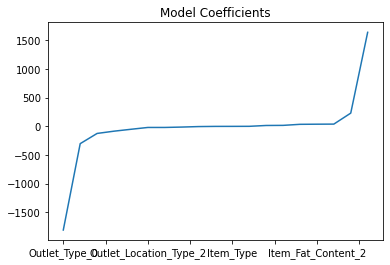

In [41]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = LinearRegression(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='line', title="Model Coefficients")

Model Report
MSE: 1641591.4071147083
CV Score: 1645087.354494685


<AxesSubplot:title={'center':'Model Coefficients'}>

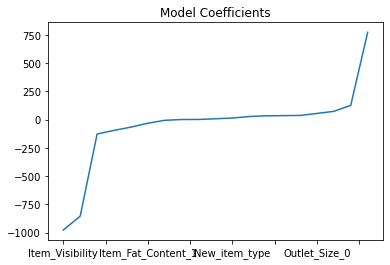

In [42]:
model = Ridge(normalize=True)
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='line', title="Model Coefficients")

Model Report
MSE: 1274035.0783318635
CV Score: 1279104.2898221705


<AxesSubplot:title={'center':'Model Coefficients'}>

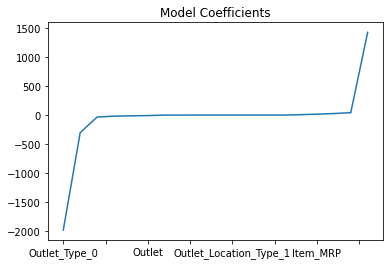

In [43]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
coef.plot(kind='line', title="Model Coefficients")

Model Report
MSE: 180382.43228674537
CV Score: 1308019.05630481


<AxesSubplot:title={'center':'Feature Importance'}>

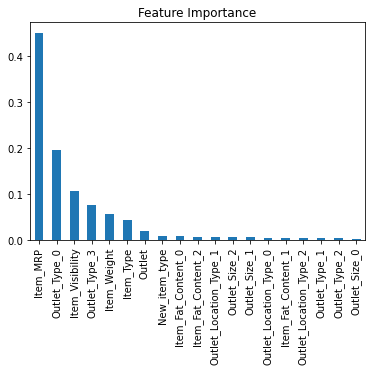

In [44]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title="Feature Importance")

### Summery

- Out of the 4 models, linear regression is the top performer with the least cv score
- In this project tutorial, we have explored the Bigmart Sales dataset. We learned the uses of one hot encoding in the dataset. We also compared different models to train the data starting from basic to advanced models.